<a href="https://colab.research.google.com/github/dhyan1999/Royal-DL/blob/master/CIFAR_Data_set_(Royal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
# (Total samples,dimension,dimension,RGB channel)

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

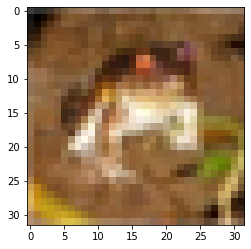

In [15]:
plt.imshow(X_train[0])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

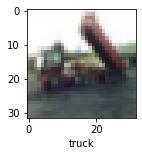

In [19]:
plot_sample(X_train, y_train, 2)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
cnn = models.Sequential([
                  ## no of features,kernal size
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.6726 - accuracy: 0.3884
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1412 - accuracy: 0.6024
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9875 - accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8913 - accuracy: 0.6922
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8122 - accuracy: 0.7201
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7596 - accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6871 - accuracy: 0.7617
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6532 - accuracy: 0.7747
Epoch 9/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.6062 - accuracy: 0.7886
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9119 - accuracy: 0.7007


[0.9119389653205872, 0.7006999850273132]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.0104080e-05, 1.5653782e-06, 1.0951795e-04, 8.4413862e-01,
        5.4141296e-06, 1.5442982e-01, 1.0093544e-03, 2.2322981e-06,
        2.5796346e-04, 2.5500756e-05],
       [3.1877782e-02, 9.4443355e-03, 1.1290735e-05, 9.4317699e-07,
        8.8894257e-07, 1.2409359e-08, 1.4626151e-08, 9.7055708e-10,
        9.5852619e-01, 1.3865973e-04],
       [8.5001782e-02, 4.0929589e-01, 1.7898640e-03, 1.5359789e-03,
        2.1595762e-03, 1.9072292e-04, 1.6231628e-04, 2.4461052e-03,
        4.9193814e-01, 5.4796902e-03],
       [8.7081689e-01, 2.4208887e-02, 8.1673339e-03, 1.2329108e-03,
        6.8818328e-05, 1.5068041e-05, 2.9997085e-05, 4.0532210e-05,
        9.4007872e-02, 1.4117301e-03],
       [3.4390064e-07, 3.0769852e-06, 8.6346539e-03, 1.8504782e-03,
        8.4850162e-01, 1.7511472e-03, 1.3925062e-01, 4.7900028e-07,
        7.5468834e-06, 4.1952326e-08]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [31]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)